In [ ]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 14.9MB/s]


In [ ]:
import pandas as pd
ad_df = pd.read_csv('/content/ads.csv')

In [ ]:
ad_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Dropping irrelevant column from dataframe
ad_df.drop(columns = ['Unnamed: 0'], inplace=True)

In [ ]:
ad_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
ad_df.shape

(200, 4)

In [ ]:
ad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
ad_df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Exploratory Data Analysis

In [ ]:
# Checking null values in dataframe
ad_df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
# checking duplicate data in dataframe
ad_df.duplicated().any()

False

### Outlier Analysis and Plotting with box plot

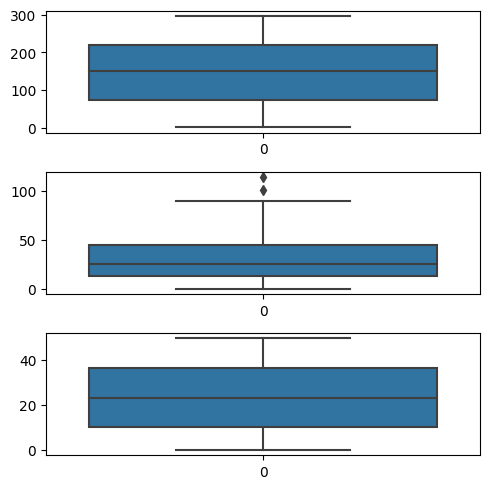

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(ad_df['TV'], ax = axs[0])
plt2 = sns.boxplot(ad_df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(ad_df['radio'], ax = axs[2])
plt.tight_layout()

<Axes: >

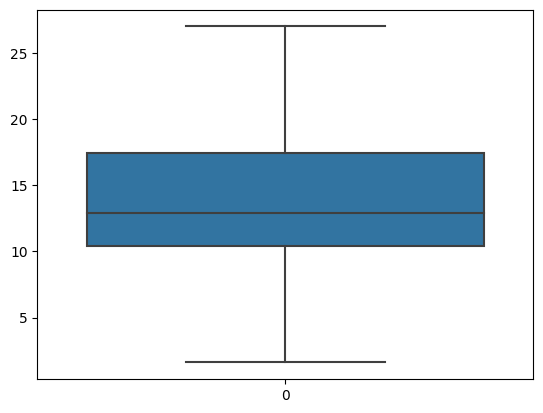

In [ ]:
sns.boxplot(ad_df['sales'])

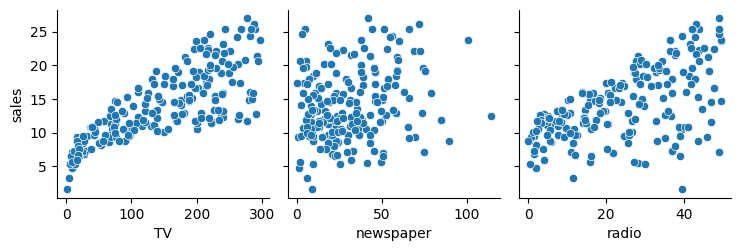

In [ ]:
# Plotting continious features
sns.pairplot(ad_df, x_vars=['TV', 'newspaper', 'radio'], y_vars = 'sales', aspect=1, kind='scatter')

## Plotting correlation

In [ ]:
ad_df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


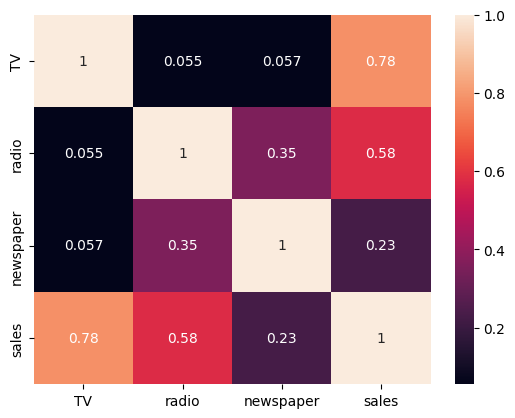

<Figure size 1000x700 with 0 Axes>

In [ ]:
sns.heatmap(ad_df.corr(), annot = True)
plt.figure(figsize=(10,7))
plt.show()

As we can see with above heatmap, TV is 78% correlated with sales, radio is 15% correlated with sales and newspaper is 23% correlated with sales.

# Data Modeling using `TV` attribute

In [ ]:
X = ad_df[['TV']]
y = ad_df['sales']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877,
       10.61402143, 17.2072847 ,  9.44612512, 17.46785121, 15.2669948 ,
        8.58532504,  9.73460946, 18.03086098,  7.37089899, 13.61053628,
       15.03899911,  7.45930549, 16.31391381, 10.62332738, 18.16579721,
       17.79821232, 10.27435438,  8.88776831, 18.79394862, 10.33019006,
        9.60897918, 17.05373658, 13.60123034, 11.17703121,  7.51048819,
       16.41627922, 10.339496  , 16.37440246,  7.90599093, 20.18053468,
       18.203021  ,  9.36702457, 19.85482655, 12.57292322,  8.39920611])

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.444420003751042

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

10.204654118800956

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.6766954295627076

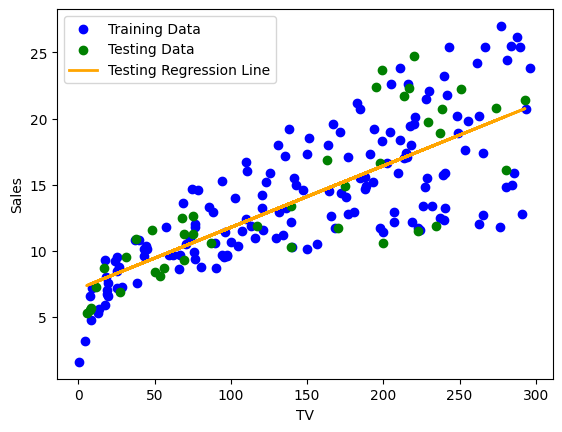

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='orange', linewidth=2, label='Testing Regression Line')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()

### using `Radio` attribute

In [ ]:
X = ad_df[['radio']]
y = ad_df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

23.248766588129108

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.9298787572224847

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.2634309396999791

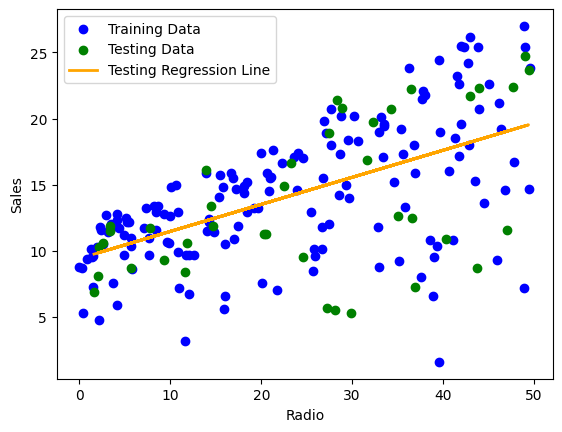

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='orange', linewidth=2, label='Testing Regression Line')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.legend()
plt.show()

### using `Newspaper` attribute

In [ ]:
X = ad_df[['newspaper']]
y = ad_df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

4.782194119516899

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

30.620733995242563

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.029871749149522397

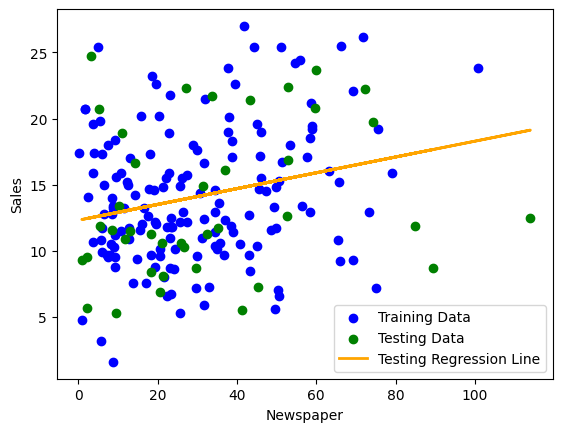

In [ ]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_test, y_pred, color='orange', linewidth=2, label='Testing Regression Line')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Using all the attributes

In [ ]:
X = ad_df[['TV','radio','newspaper']]
y = ad_df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

3.1740973539761033

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.4607567168117603

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.899438024100912

The above linear regression task we obtained a max r2_score of 0.89 when using all the attributes to calculate the regression model.